In [1]:
import torch
import seaborn as sns

def sigmoid_boundary_sigmoid(_input, boundary_x, boundary_y, temperature):
    return torch.sigmoid((_input - boundary_x) / temperature) * \
        torch.sigmoid((boundary_y - _input) / temperature)

def harmonic_boundary_sigmoid(_input, boundary_x, boundary_y, temperature):
    return (_input<=boundary_x)*torch.sigmoid((_input - boundary_x) / temperature) + \
    (_input>=boundary_y)*torch.sigmoid((boundary_y - _input) / temperature) + \
    ((_input>boundary_x)&(_input<boundary_y))*torch.sigmoid(
        (0.5 * (torch.abs(_input - boundary_x)**(-1) + torch.abs(_input - boundary_y)**(-1)))**(-1) / temperature
    )


In [15]:
# Create a 2x2 weight matrix with random floating-point values between 10 and 2048
weights = torch.rand((2), requires_grad=True) * 2038 + 10

# Convert the weight matrix to a learnable parameter
weights = torch.nn.Parameter(weights)

In [19]:
torch.cumsum(weights, dim=0)

tensor([1131.3152, 1848.0818], grad_fn=<CumsumBackward0>)

<AxesSubplot:>

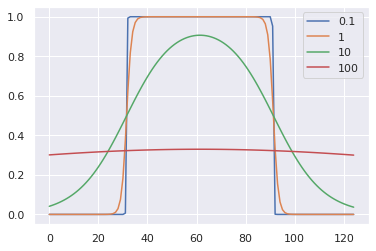

In [4]:
sns.set(rc={'figure.figsize':(5, 3)})
sns.lineplot(
    x=torch.arange(0, 125), 
    y=sigmoid_boundary_sigmoid(torch.arange(0, 125), 31.5, 91.3, 0.1),
    label='0.1'
)
sns.lineplot(
    x=torch.arange(0, 125), 
    y=sigmoid_boundary_sigmoid(torch.arange(0, 125), 31.5, 91.3, 1),
    label='1'
)
sns.lineplot(
    x=torch.arange(0, 125), 
    y=sigmoid_boundary_sigmoid(torch.arange(0, 125), 31.5, 91.3, 10),
    label='10'
)
sns.lineplot(
    x=torch.arange(0, 125), 
    y=sigmoid_boundary_sigmoid(torch.arange(0, 125), 31.5, 91.3, 100),
    label='100'
)

<AxesSubplot:>

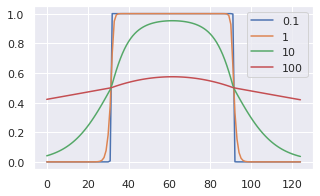

In [5]:
sns.set(rc={'figure.figsize':(5, 3)})
sns.lineplot(
    x=torch.arange(0, 125), 
    y=harmonic_boundary_sigmoid(torch.arange(0, 125), 31.5, 91.3, 0.1),
    label='0.1'
)
sns.lineplot(
    x=torch.arange(0, 125), 
    y=harmonic_boundary_sigmoid(torch.arange(0, 125), 31.5, 91.3, 1),
    label='1'
)
sns.lineplot(
    x=torch.arange(0, 125), 
    y=harmonic_boundary_sigmoid(torch.arange(0, 125), 31.5, 91.3, 10),
    label='10'
)
sns.lineplot(
    x=torch.arange(0, 125), 
    y=harmonic_boundary_sigmoid(torch.arange(0, 125), 31.5, 91.3, 100),
    label='100'
)